In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 2, 2, 256)        

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 2, 2, 256)        

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 203s 270ms/step - loss: 0.4051 - accuracy: 0.8667 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 2/5
750/750 [==============================] - 202s 269ms/step - loss: 0.0462 - accuracy: 0.9872 - val_loss: 0.0314 - val_accuracy: 0.9907
Epoch 3/5
750/750 [==============================] - 204s 272ms/step - loss: 0.0262 - accuracy: 0.9926 - val_loss: 0.0286 - val_accuracy: 0.9924
Epoch 4/5
750/750 [==============================] - 203s 270ms/step - loss: 0.0214 - accuracy: 0.9942 - val_loss: 0.0281 - val_accuracy: 0.9930
Epoch 5/5
750/750 [==============================] - 201s 268ms/step - loss: 0.0166 - accuracy: 0.9954 - val_loss: 0.0389 - val_accuracy: 0.9923


In [ ]:
#With Rmsprop
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 10s 32ms/step - loss: 0.0309 - accuracy: 0.9921


0.9921000003814697

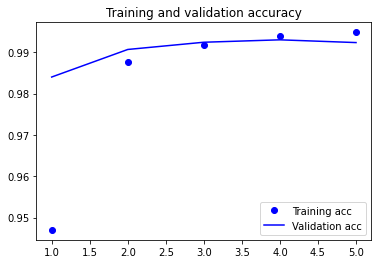

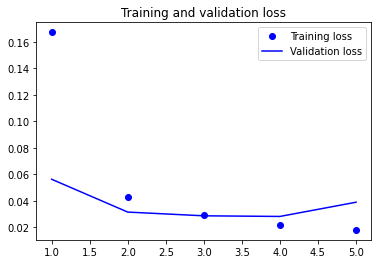

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
##With SGD
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 202s 269ms/step - loss: 1.8239 - accuracy: 0.4016 - val_loss: 0.2302 - val_accuracy: 0.9259
Epoch 2/5
750/750 [==============================] - 202s 270ms/step - loss: 0.2019 - accuracy: 0.9373 - val_loss: 0.1387 - val_accuracy: 0.9574
Epoch 3/5
750/750 [==============================] - 202s 269ms/step - loss: 0.1088 - accuracy: 0.9667 - val_loss: 0.0868 - val_accuracy: 0.9728
Epoch 4/5
750/750 [==============================] - 205s 274ms/step - loss: 0.0809 - accuracy: 0.9752 - val_loss: 0.0732 - val_accuracy: 0.9761
Epoch 5/5
750/750 [==============================] - 202s 270ms/step - loss: 0.0654 - accuracy: 0.9789 - val_loss: 0.0649 - val_accuracy: 0.9806


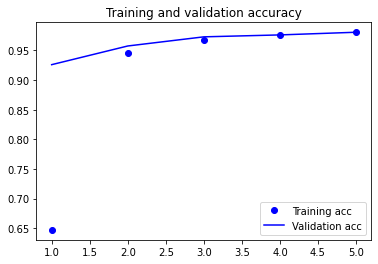

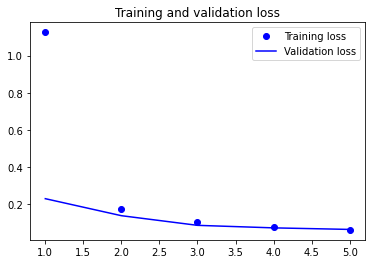

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 10s 32ms/step - loss: 0.0511 - accuracy: 0.9849


0.9848999977111816